In [25]:
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import signal


plot_trace = True
template_path = './arch'
test_path = './datasets/nodemcu-random-test2'
train_path = './datasets/nodemcu-random-train2'

def butter_filter(trace, order=1, cutoff=0.01, filter_type='low', fs=None):
    """
    Apply butter filter to trace
    """
    b, a = signal.butter(order, cutoff, btype=filter_type, fs=fs)
    trace_filtered = signal.filtfilt(b, a, trace)
    return trace_filtered


def plot_trace(trace, title='Trace', xlabel='Time', ylabel='Amplitude'):
    """
    Plot trace
    """
    plt.plot(trace)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Make Templates

1. Make boot template (manual select) -> archboot
2. Make template using training dataset -> arch
3. Remove triggers -> archnotigger

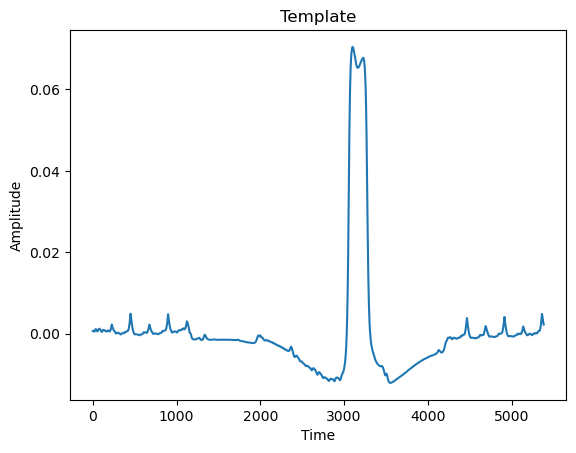

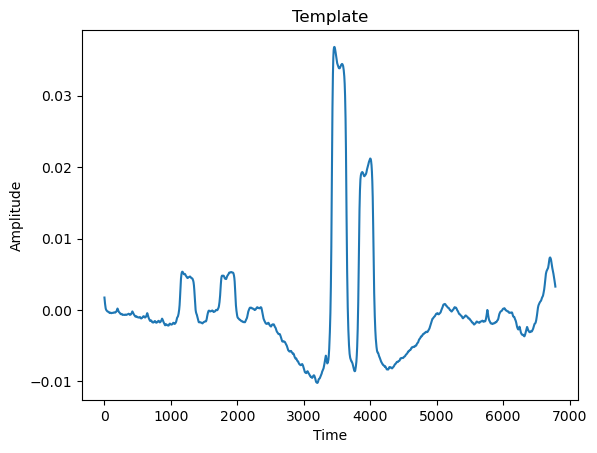

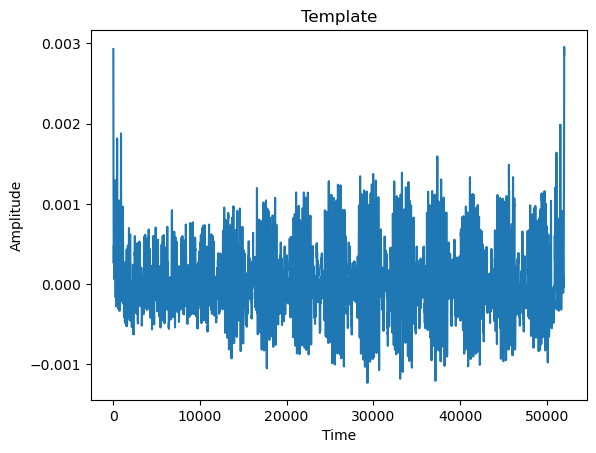

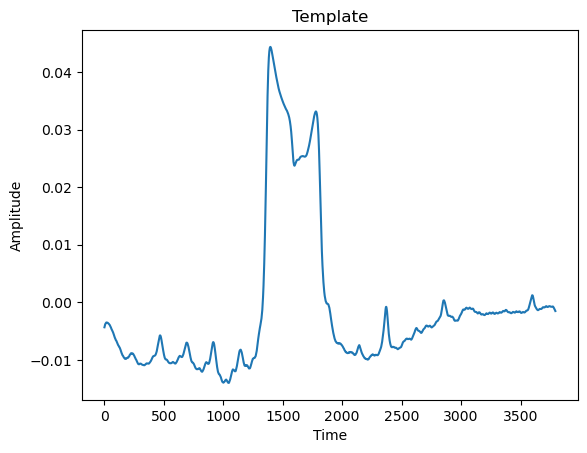

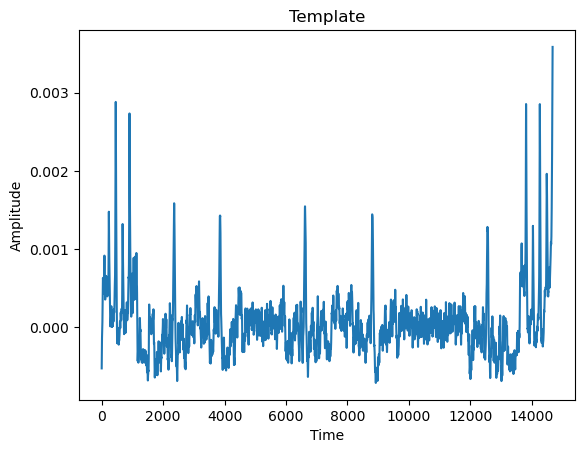

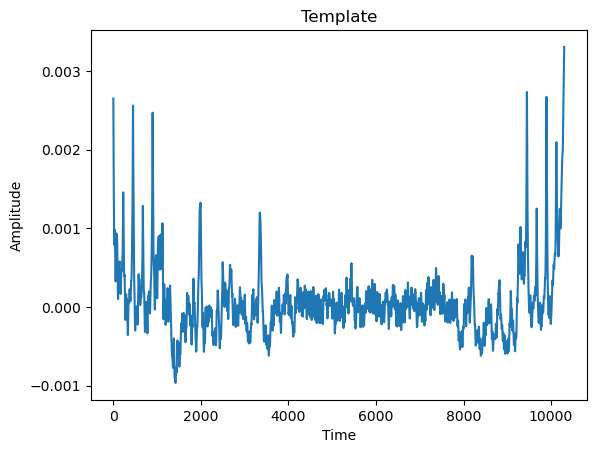

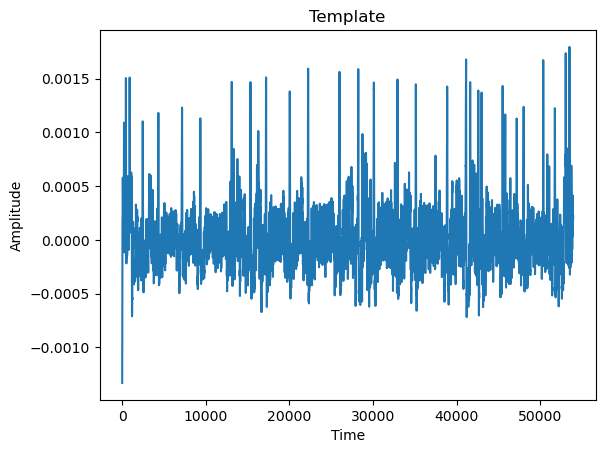

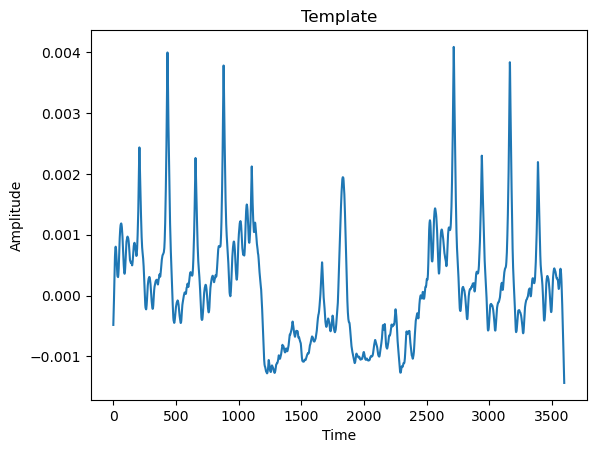

In [26]:
# make templates
# 1. load visually identified templates
# 
boot_templates = []
templates_path = './arch'
for entry in os.listdir(templates_path):
    if not entry.endswith('.npy'):
        continue
    template = np.load(os.path.join(templates_path, entry))
    template = butter_filter(template, order=1, cutoff=0.02, filter_type='low', fs=None)
    boot_templates.append(template)

    if plot_trace:
        plot_trace(template, title='Template')


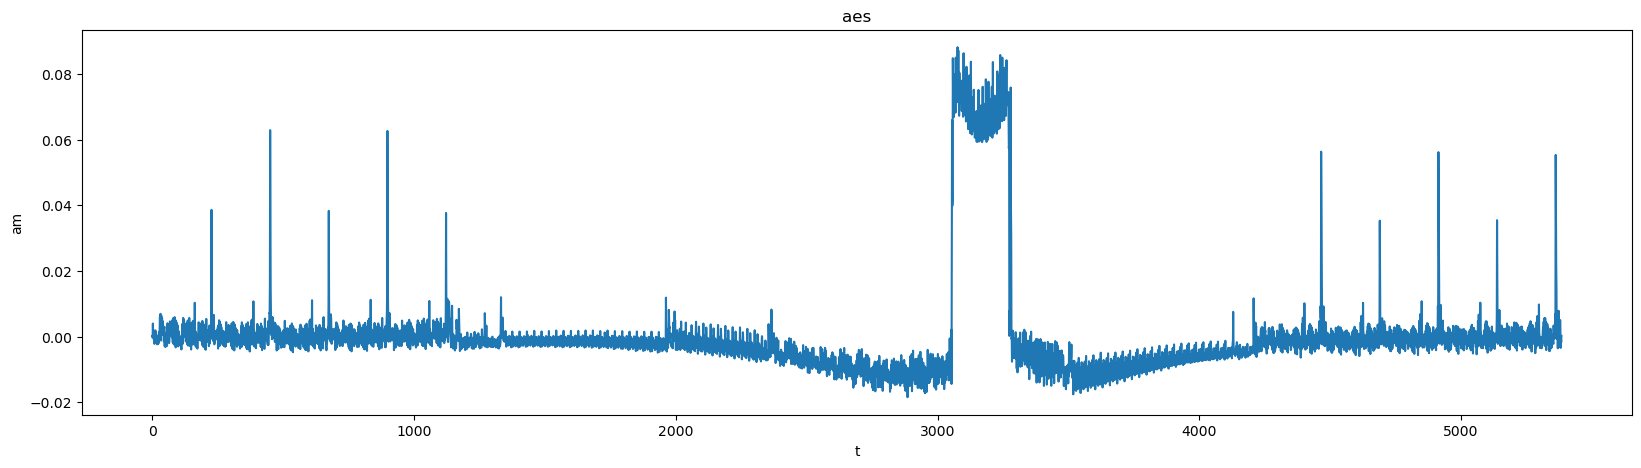

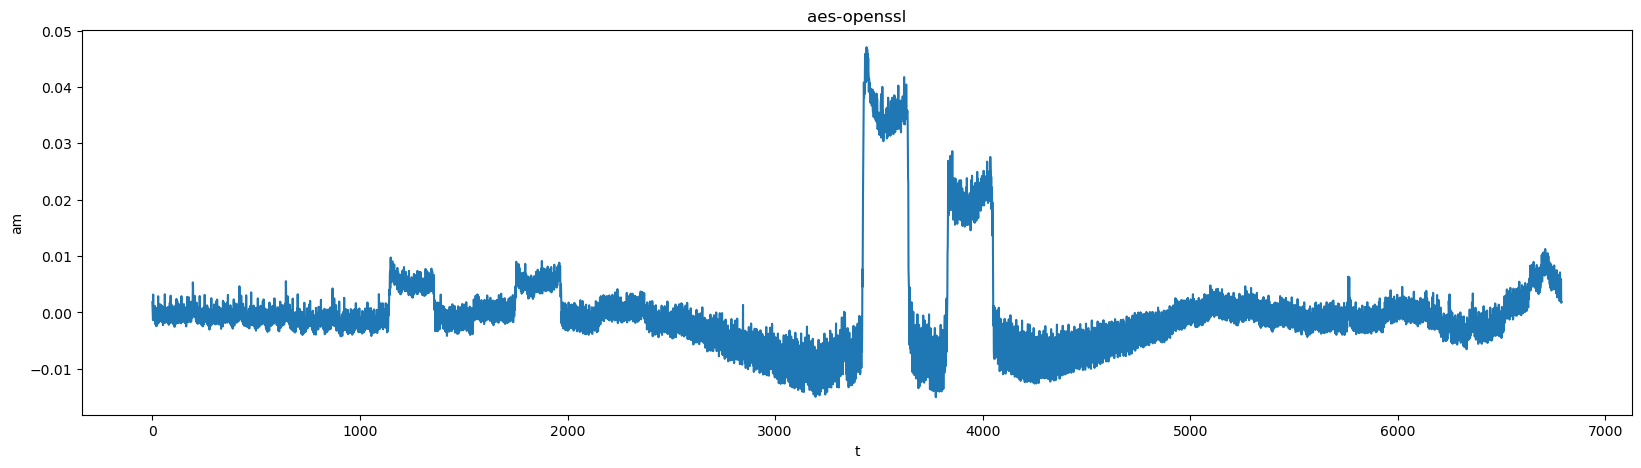

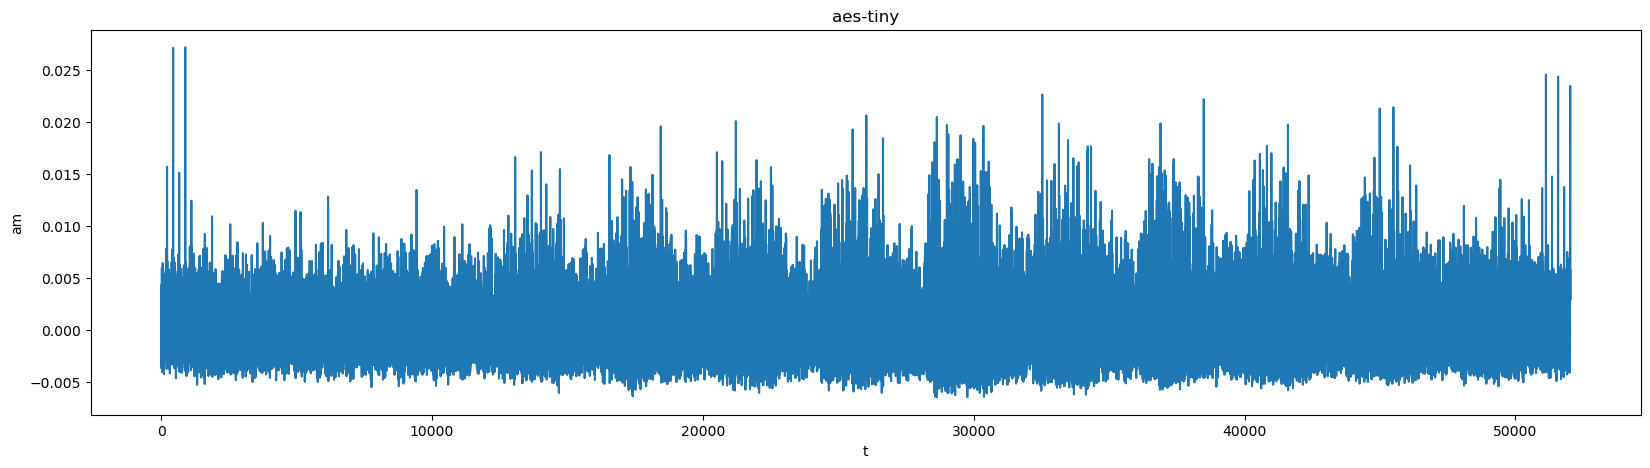

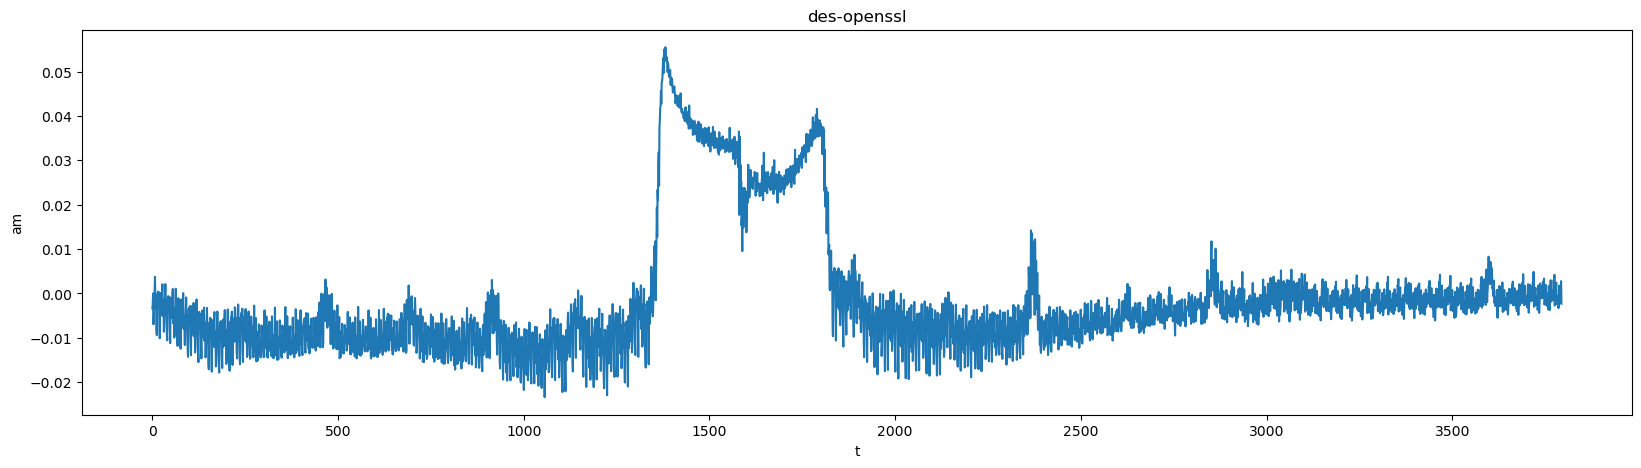

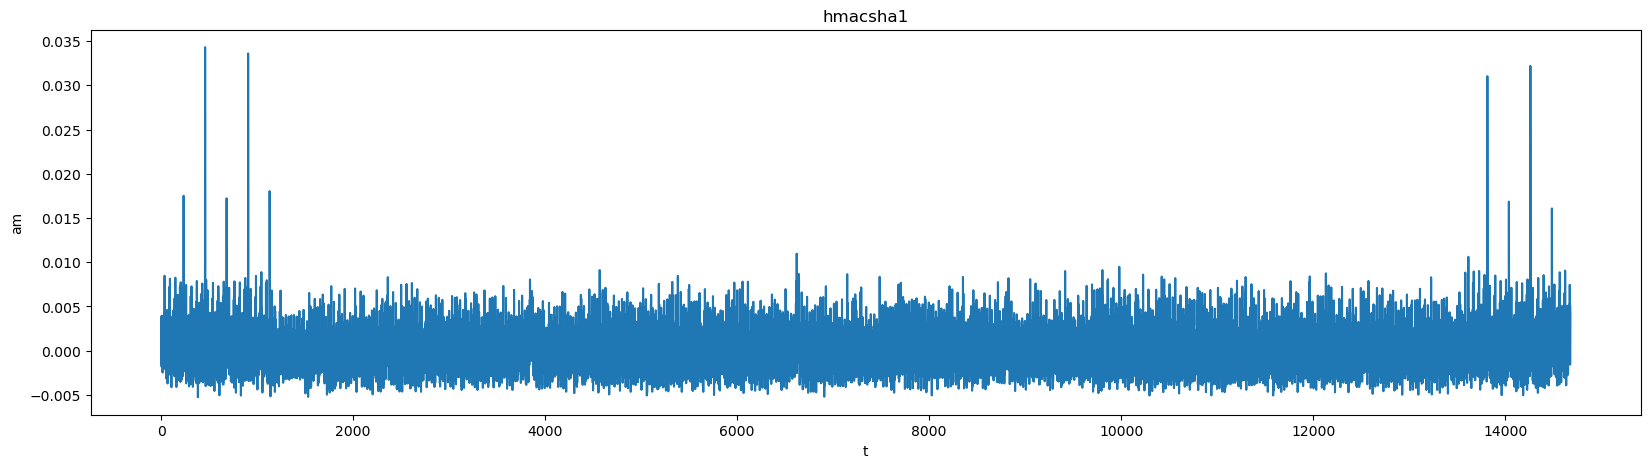

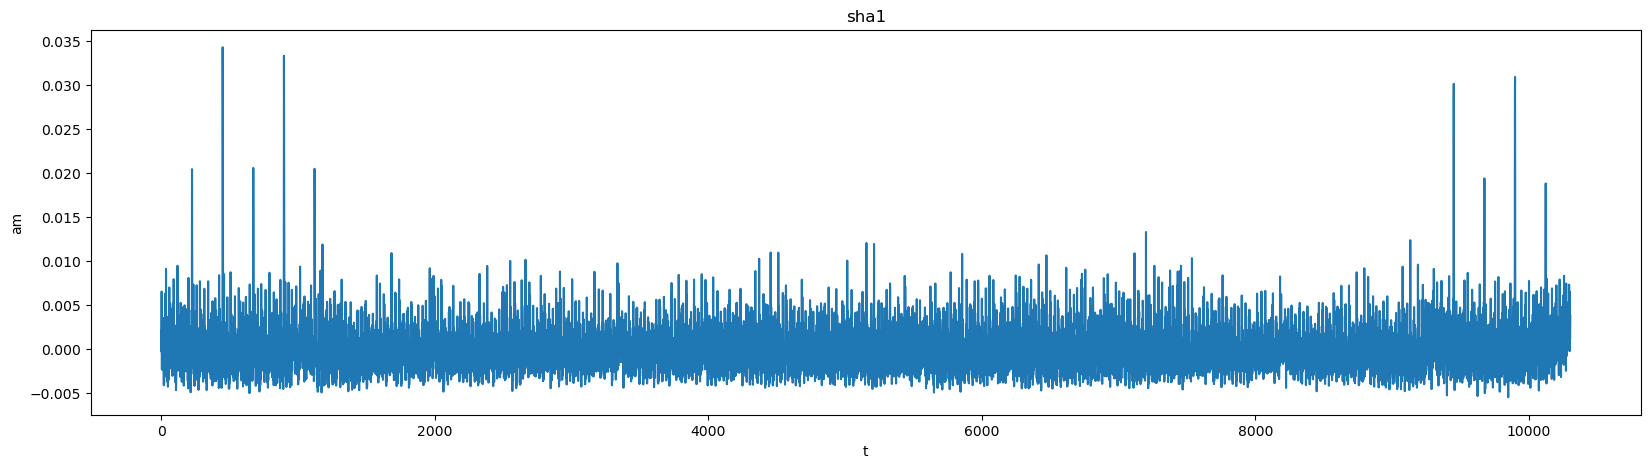

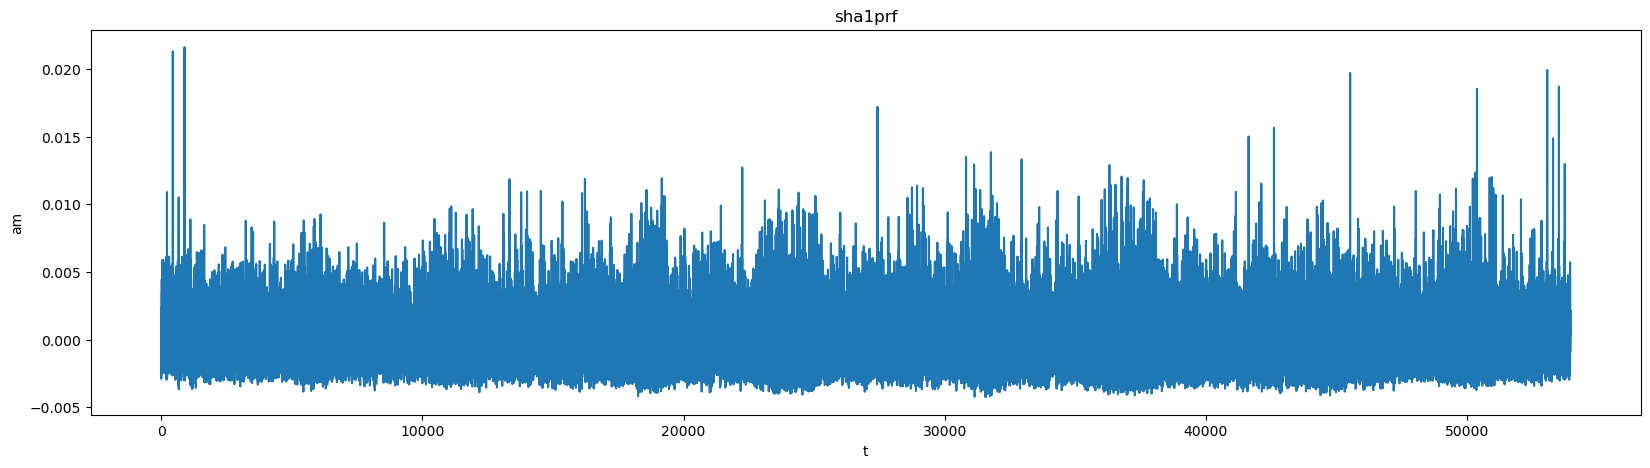

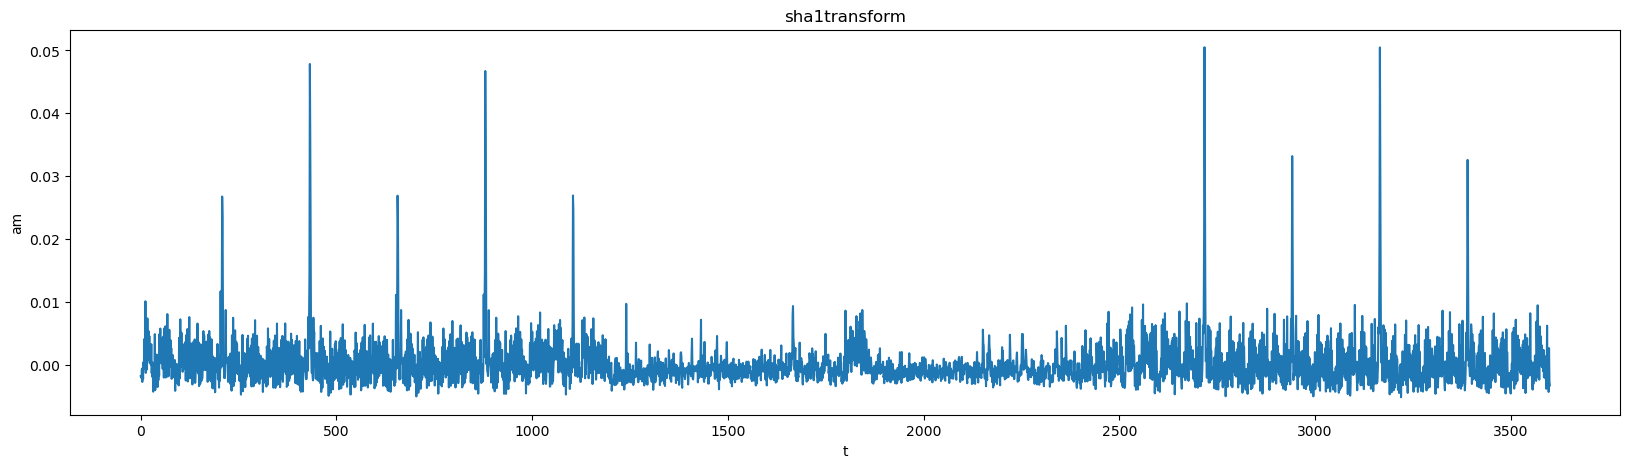

In [38]:
# Load and plot templates
filelist = os.listdir(template_path)
ops = []
templates = []
for file in filelist:  
    filepath = os.path.join(template_path, file)
    template = np.load(filepath, allow_pickle=True)
    templates.append(template)

    if len(file.split('-'))== 3:
        op = file.split('-')[1]
    else:
        op = '-'.join(file.split('-')[1:3])
    
    ops.append(op)

    if plot_trace:
        fig, ax = plt.subplots(figsize=(20,5))
        ax.plot(np.linspace(0, len(template), len(template)), template)
        ax.set(xlabel='t')
        ax.set_ylabel('am')
        ax.set_title(op)
        plt.show()

# *Zero-mean normalized cross-correlation*

operation $o$
$$\hat{o}=\mathop{\arg \max }_{o\in O} {(\max_t {(c_{b_o,x}(t))})}$$

$$c_{b_{o},x}(t) = \frac{\sum_{i=1}^{n_{b}} (b_o(i)-\overline{b_{o}})(x(i+t)-\overline{x}(t))} {\sqrt{\sum_{i=1}^{n_{b}} (b_o(i)-\overline{b_{o}})^2}\sqrt{\sum_{i=1}^{n_{b}}(x(i+t)-\overline{x}(t))^2}} $$

In [39]:
def corr(b, x, t):
    """
    b: template trace, numpy array
    x: trace of interest, numpy array
    t: time index, int

    output: Zero-mean normalized cross-correlation between b and x[t:t+len(b)].
    Assuming that the length of b is less than the length of x.
    """
    b_offset = b - np.mean(b)
    x_prime = x[t:t+len(b)]
    x_offset = x_prime - np.mean(x_prime)
    return np.sum(b_offset*x_offset) / (np.sqrt(np.sum(b_offset**2)) * np.sqrt(np.sum(x_offset**2)))

# print(zncc(templates[0], templates[0], 0))

In [40]:
dataset_files = os.listdir(test_path)
for i, file in enumerate(dataset_files):
    if '_traces.npy' in file:
        trace_name = file
        meta_name = file.rpartition('_traces.npy')[0] + "_meta.p"
        # print(trace_name, meta_name)
    
        trace_path = os.path.join(test_path, trace_name)
        meta_path = os.path.join(test_path, meta_name)
        
        traces = np.load(trace_path, allow_pickle=True)
        metas = np.load(meta_path, allow_pickle=True)

        for i, trace in enumerate(traces):
            print(trace.shape)
            
            break
    

(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(101920,)
(131072,)
(131072,)
(131072,)
(121224,)
(131072,)
(73472,)
(71440,)
(111064,)
(131072,)
(118176,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(92776,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(108524,)
(131072,)
(115636,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(84648,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(105476,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(131072,)
(47564,)
(124272,)
(110048,)
(107000,)
(131072,)
(120716,)
(131072,)
(109032,)
(131072,)
(131072,)
(100396,)
(105476,)
(131072,)
(92776,)
(131072,)
(131072,)
(131072,)
(105476,)
(108524,)
(131072,)
(131072,)
(131072,)
(131072,)
(127320,)
(13107